1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [63]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 3)

In [65]:
data, target

(array([[ 0.59808962, -0.16400084],
        [-0.61277018, -0.97358312],
        [ 1.04310749, -0.66960072],
        ...,
        [ 1.22089151, -2.01159456],
        [-2.21079164,  0.14181052],
        [-0.6387909 , -0.65441521]]),
 array([ 2.18002939e+01, -1.29264887e+02, -8.43276087e+00,  1.69905867e+02,
         1.34932636e+02, -3.35383428e+01,  9.45677735e+01, -5.43248813e+00,
        -2.97081683e+01, -1.71881455e+02, -4.81295141e+00,  1.79865346e+01,
         3.09108636e+01, -2.01631274e+01,  1.27694788e+02,  9.20782273e+01,
         9.03094898e+01, -9.05676106e+01, -1.39067411e+02, -8.59194598e+01,
         1.29584550e+02,  6.65626452e+01,  3.41619343e+01,  1.51864875e+01,
        -1.70032387e+02, -1.14705468e+02,  2.09623446e+01,  1.27359186e+02,
         1.52259958e+02,  8.89221069e+01,  7.28979898e+01,  6.57444478e+01,
         7.56342971e+01,  6.50889164e+01, -6.51067433e+01, -2.31706653e+02,
        -3.06575885e+02,  1.21776744e+02,  1.07763814e+01,  7.03212339e+01,
        -

In [66]:
X = StandardScaler()

In [67]:
data = X.fit_transform(data)

In [68]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Градиентный спуск

In [69]:
w = np.zeros(2)
# список векторов весов после каждой итерации
w_list = [w.copy()]
# список значений ошибок после каждой итерации
errors = []
# шаг градиентного спуска
eta = 0.1
# максимальное число итераций
max_iter = 1e4
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
# зададим начальную разницу весов большим числом
weight_dist = np.inf
# счетчик итераций
iter_num = 0
np.random.seed(1234)
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    #new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))
    
        iter_num += 1
        w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}, вектор весов w = {w_list[-1]}')

В случае использования градиентного спуска функционал ошибки составляет 28.9597, вектор весов w = [54.93485657 95.12420775]


Cтохастический градиентный спуск

In [70]:
w = np.zeros(2)
# список векторов весов после каждой итерации
w_list_st = [w.copy()]
# список значений ошибок после каждой итерации
errors_st = []
# шаг градиентного спуска
eta = 0.04
# максимальное число итераций
max_iter = 1e5
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
# зададим начальную разницу весов большим числом
weight_dist = np.inf
# счетчик итераций
iter_num = 0
np.random.seed(1234)
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list_st.append(new_w.copy())
    errors_st.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list_st = np.array(w_list_st)


print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_st[-1], 4)}, вектор весов w = {w_list_st[-1]}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 29.8096, вектор весов w = [54.46193367 94.33160452]


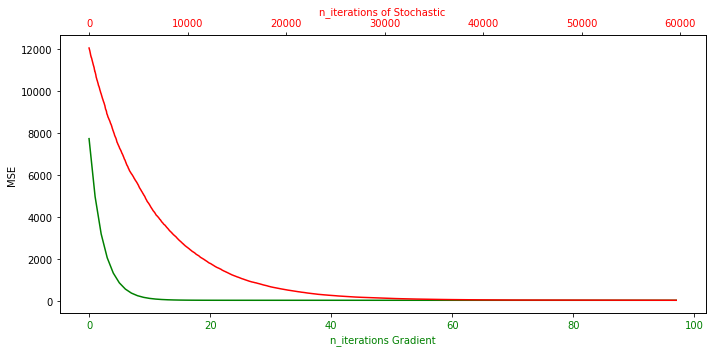

In [71]:
# Визуализируем изменение функционала ошибки
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel('n_iterations Gradient', color='green')
ax1.set_ylabel('MSE')
ax1.plot(errors, color='green')
ax1.tick_params(axis='x', labelcolor='green')
ax2 = ax1.twiny()
ax2.set_xlabel('n_iterations of Stochastic', color='red')
ax2.plot(errors_st, color='red')
ax2.tick_params(axis='x', labelcolor='red')
fig.tight_layout()
plt.show()

Добавим 𝐿2 -регуляризацию для Градиентного спуска

In [72]:
w = np.zeros(2)
# список векторов весов после каждой итерации
w_list = [w.copy()]
# список значений ошибок после каждой итерации
errors = []
# шаг градиентного спуска
eta = 0.1
# максимальное число итераций
max_iter = 1e4
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
# зададим начальную разницу весов большим числом
weight_dist = np.inf
# счетчик итераций
iter_num = 0
np.random.seed(1234)
# ход градиентного спуска
lambda_ = 1e-5
while weight_dist > min_weight_dist and iter_num < max_iter:
    #new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target) + lambda_ * np.sum(np.square(new_w)))
    
        iter_num += 1
        w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска с 𝐿2 -регуляризацией функционал ошибки составляет {round(errors[-1], 4)}, вектор весов w = {w_list[-1]}')

В случае использования градиентного спуска с 𝐿2 -регуляризацией функционал ошибки составляет 29.0803, вектор весов w = [54.93485657 95.12420775]


Добавим 𝐿2 -регуляризацию для Стохастического градиентного спуска

In [74]:
w = np.zeros(2)
# список векторов весов после каждой итерации
w_list_st = [w.copy()]
# список значений ошибок после каждой итерации
errors_st = []
# шаг градиентного спуска
eta = 0.04
# максимальное число итераций
max_iter = 1e5
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
# зададим начальную разницу весов большим числом
weight_dist = np.inf
# счетчик итераций
iter_num = 0
np.random.seed(1234)
lambda_ = 1e-5
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list_st.append(new_w.copy())
    errors_st.append(mserror(data, new_w, target) + lambda_ * np.sum(np.square(new_w)))
    
    iter_num += 1
    w = new_w
    
w_list_st = np.array(w_list_st)


print(f'В случае использования стохастического градиентного спуска с 𝐿2 -регуляризацией функционал ошибки составляет {round(errors_st[-1], 4)}, вектор весов w = {w_list_st[-1]}')

В случае использования стохастического градиентного спуска с 𝐿2 -регуляризацией функционал ошибки составляет 29.9283, вектор весов w = [54.46193367 94.33160452]
